In [1]:
import json
import matplotlib.pyplot as plt
import time
import ezdxf

--- 0.6802194118499756 seconds ---


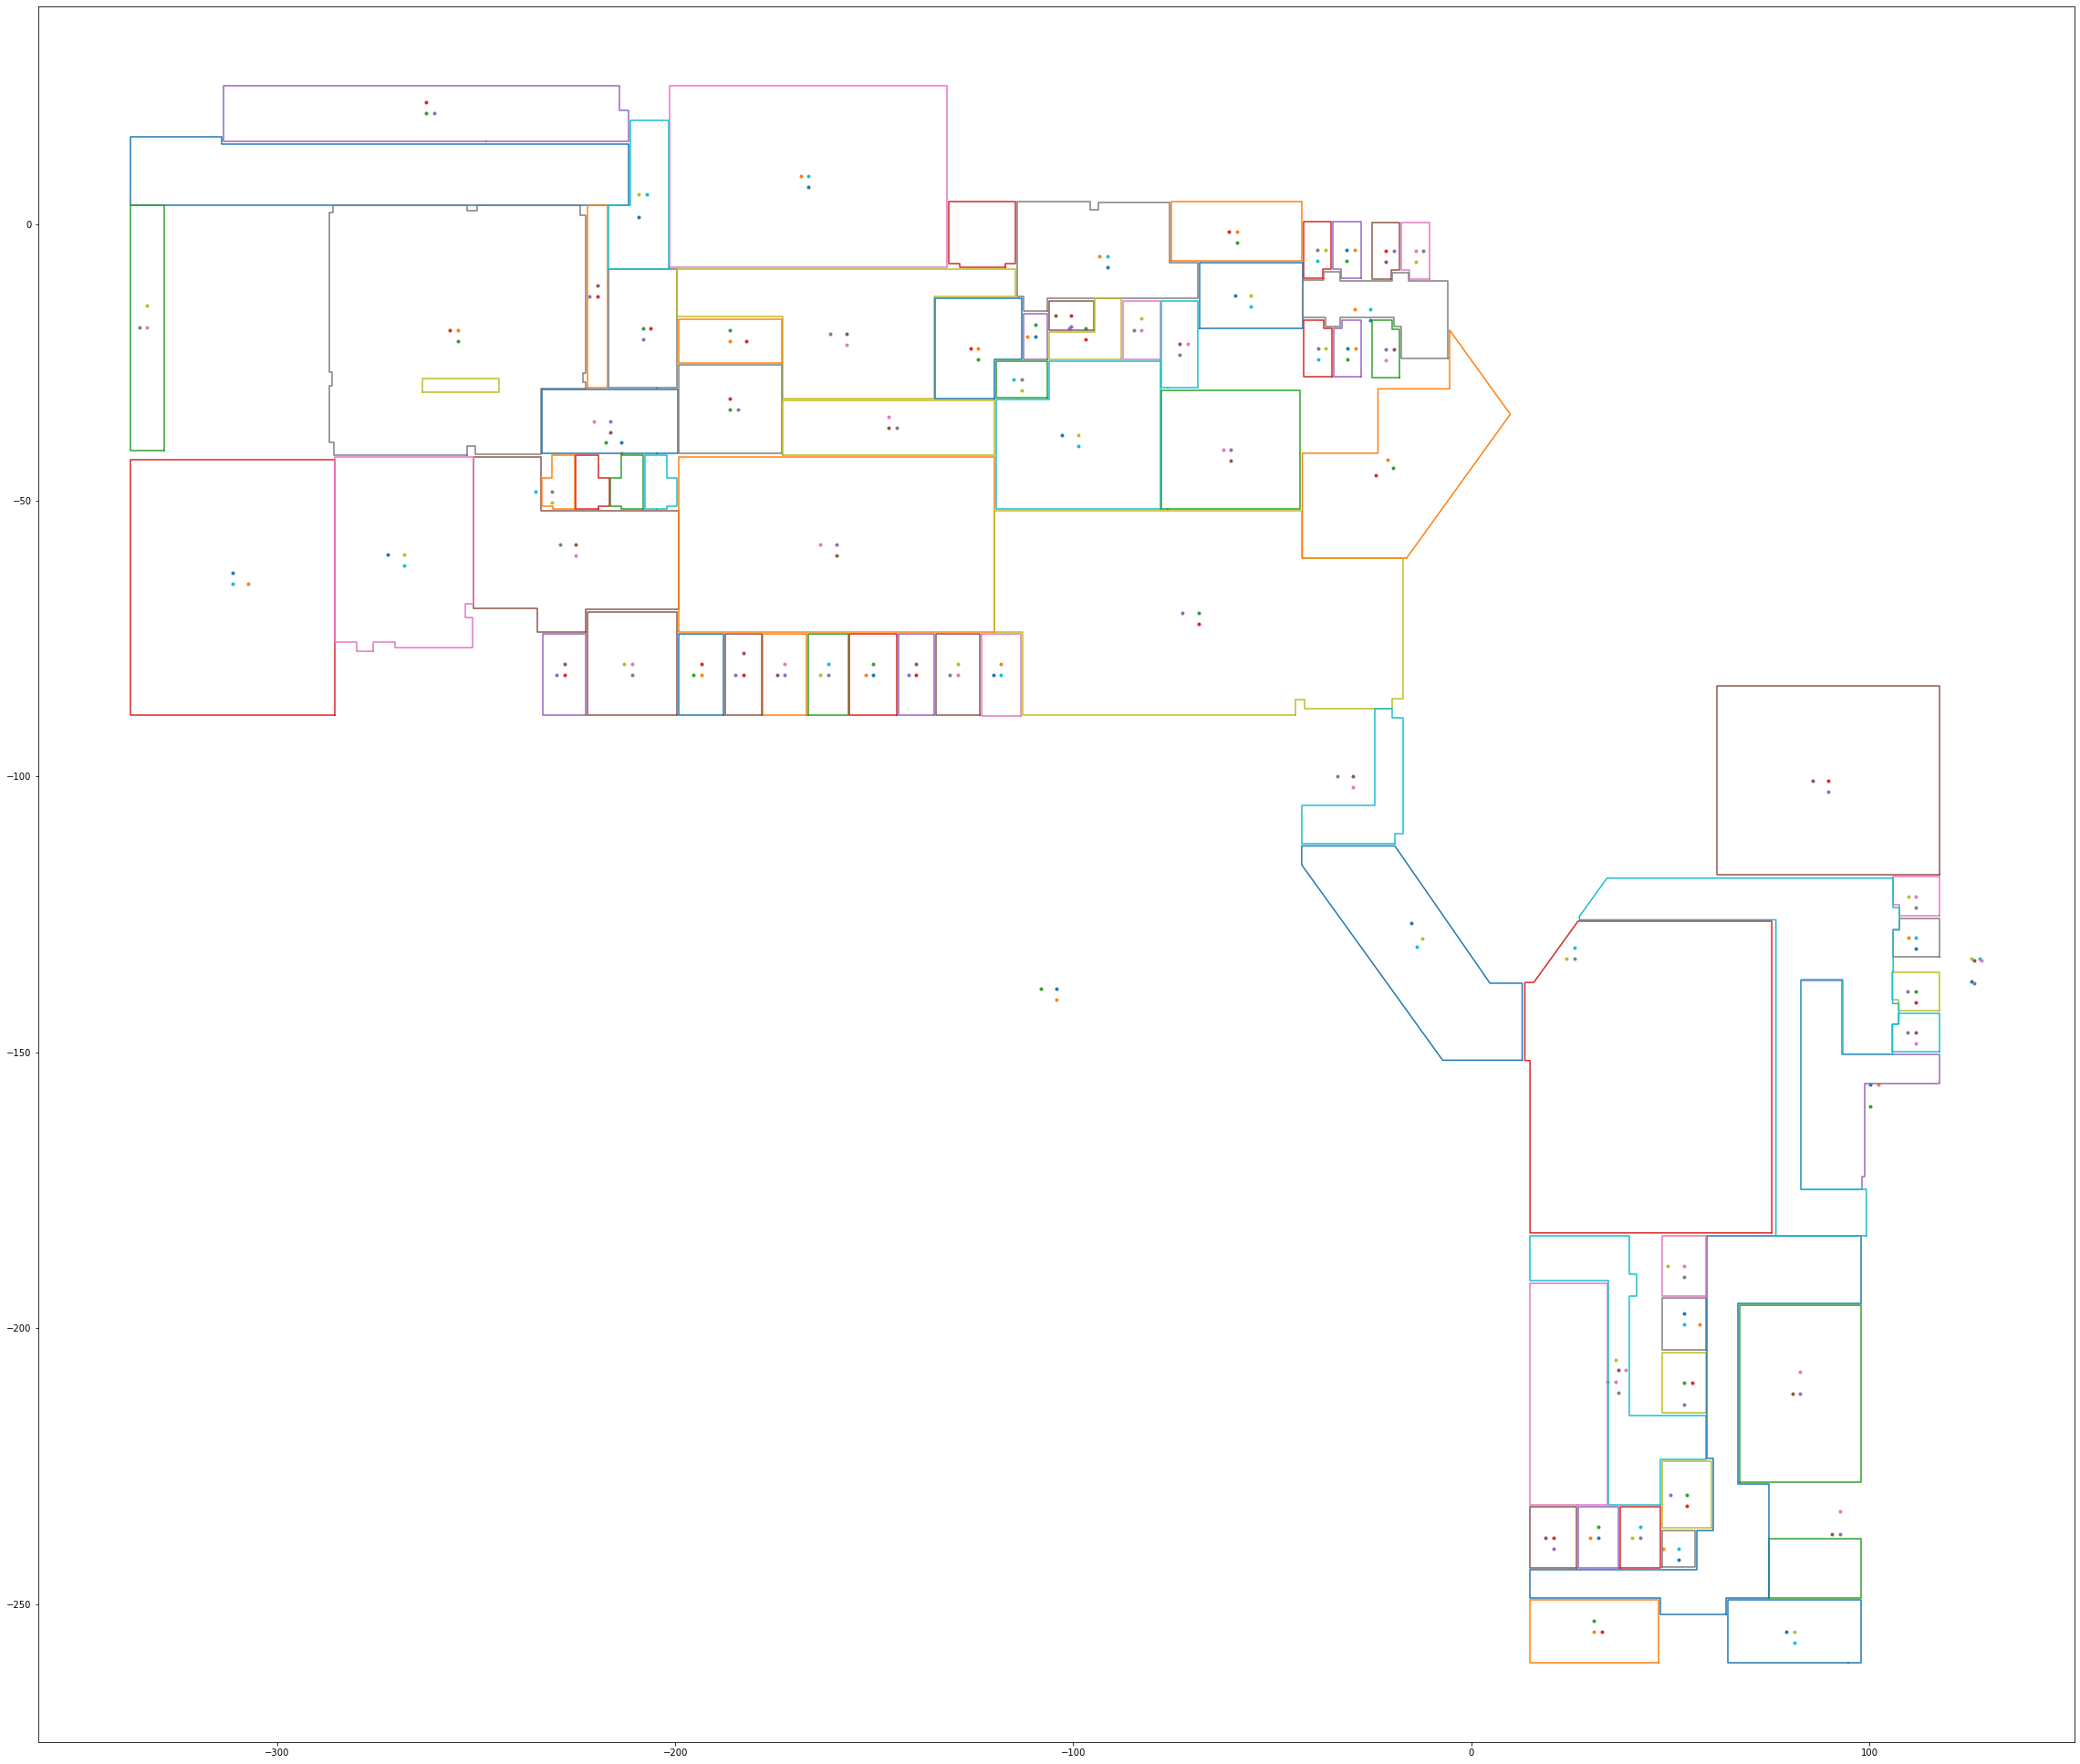

In [2]:
start_time = time.time()

path="./Examples/Input/3DVESBUILDINGDXF/3DVESBUILDING_Reflected Ceiling Plan - LEVEL 01_02152022.dxf"
doc = ezdxf.readfile(path)
msp = doc.modelspace()

faces=[]
GridPoints = []
basePoints = []
i=0
j=0
names = []
spaces = []
for flag_ref in msp.query('HATCH'):
    name = flag_ref.dxf.pattern_name
    hatch_name =name.find('FP')
    hatch_layer=flag_ref.dxf.layer.find('CLNG')
    if hatch_name != -1 and hatch_layer != -1:
        patterns = flag_ref.pattern.lines
        paths = flag_ref.paths.default_paths()
        space = {"name":name,"FP_":[]}
        
        if len(patterns) == 2:
            for path in flag_ref.paths:
                face = {"face":[]}
                edges = path.edges
                plotface =[]
                for edge in edges:
                    point= []
                    b=edge.start
                    point.append(edge.start.x)
                    point.append(edge.start.y)
                    plotface.append(edge.start.x)
                    plotface.append(edge.start.y)
                    face["face"].append(point)

                space["FP_"].append(face)
        
            for pattern in patterns:
                
                angle = pattern.angle
                angle_dict = {"Angle":[]}
                angle_dict["Angle"].append(angle)
                space["FP_"].append(angle_dict)
            
                basePoint = {"BasePoint":[]}
                base_point_x = pattern.base_point.x
                base_point_y  = pattern.base_point.y
                base_point = [base_point_x,base_point_y]
                basePoint["BasePoint"].append(base_point)
                space["FP_"].append(basePoint)
        
        
                offset = {"Offset":[]}
                offset_x = pattern.offset.x
                offset_y = pattern.offset.y
                offset_point = [offset_x,offset_y]
                offset["Offset"].append(offset_point)
                space["FP_"].append(offset)
        
                point= []
                tr_point = {"TransltdPoint":[]}
                tr_point["TransltdPoint"].append([base_point_x+offset_x,base_point_y+offset_y])
                space["FP_"].append(tr_point)
            spaces.append(space)
            
        if len(patterns) != 2:
            for path in flag_ref.paths:
                face = {"face":[]}
                edges = path.edges
                plotface =[]
                for edge in edges:
                    point= []
                    b=edge.start
                    point.append(edge.start.x)
                    point.append(edge.start.y)
                    plotface.append(edge.start.x)
                    plotface.append(edge.start.y)
                    face["face"].append(point)

                space["FP_"].append(face)
        
            for pattern in patterns:
                
                angle_dict = {"Angle":[]}
                angle_dict["Angle"].append(None)
                space["FP_"].append(angle_dict)
            
                basePoint = {"BasePoint":[]}
                basePoint["BasePoint"].append(None)
                space["FP_"].append(basePoint)
        
        
                offset = {"Offset":[]}
                offset["Offset"].append(None)
                space["FP_"].append(offset)
        
                tr_point = {"TransltdPoint":[]}
                tr_point["TransltdPoint"].append([None])
                space["FP_"].append(tr_point)

jsonToMethod1 = spaces

plt.figure(figsize=(40,35))

for i in range(len(jsonToMethod1)):
    refPoint = []
    for k in range(len(jsonToMethod1[i]['FP_'])):
        tag = jsonToMethod1[i]['FP_'][k]
        for name in tag:
            if name == "face":
                listxy = jsonToMethod1[i]['FP_'][k]['face']
                x = []
                y = []
                for j in listxy:
                    x.append(j[0])
                    y.append(j[1])
                x.append(listxy[0][0])
                y.append(listxy[0][1])
                plt.plot(x,y)
            elif name == "BasePoint":
                if jsonToMethod1[i]['FP_'][k]['BasePoint'][0] not in refPoint:
                    refPoint.append(jsonToMethod1[i]['FP_'][k]['BasePoint'][0])
                    plt.scatter(jsonToMethod1[i]['FP_'][k]['BasePoint'][0][0],jsonToMethod1[i]['FP_'][k]['BasePoint'][0][1],marker='.')
            elif name == "TransltdPoint":
                if jsonToMethod1[i]['FP_'][k]['TransltdPoint'][0] not in refPoint:
                    refPoint.append(jsonToMethod1[i]['FP_'][k]['TransltdPoint'][0])
                    plt.scatter(jsonToMethod1[i]['FP_'][k]['TransltdPoint'][0][0],jsonToMethod1[i]['FP_'][k]['TransltdPoint'][0][1],marker='.')

print("--- %s seconds ---" % (time.time() - start_time))

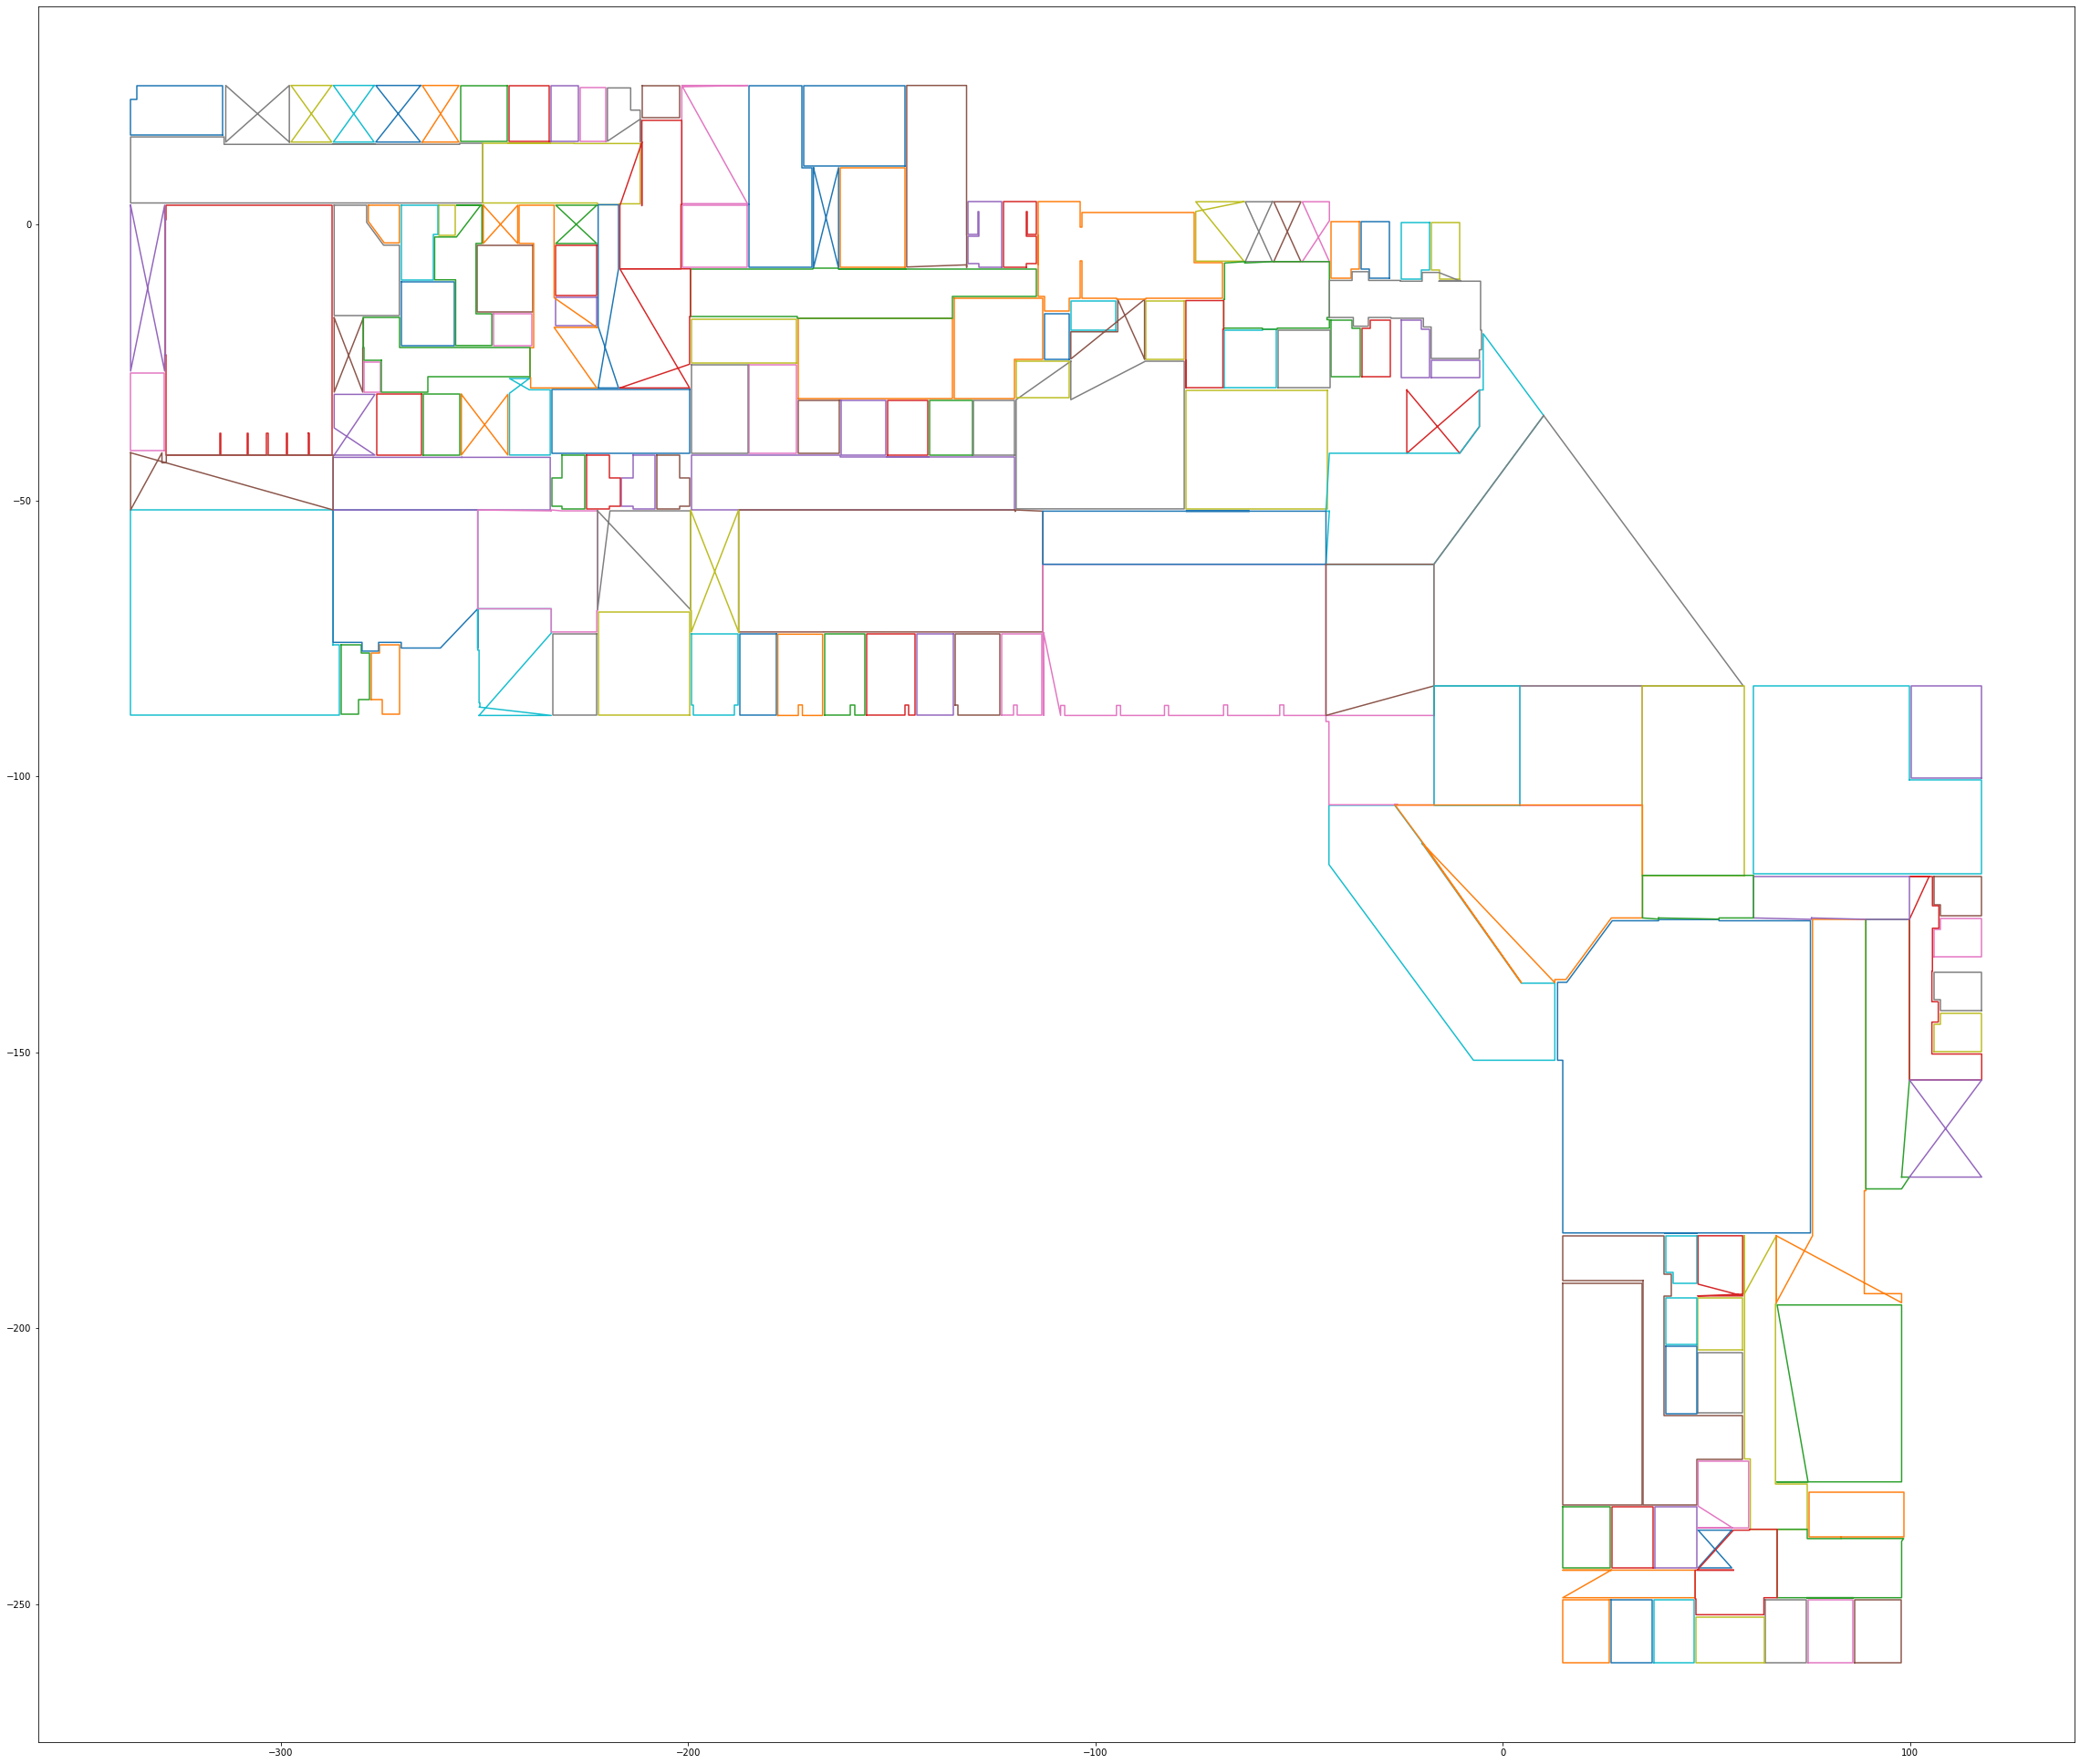

In [3]:
with open(('./Examples/Input/3DVESBUILDINGDXF/Planar_Geometry_3DVESBUILDING_Floor_1.json')) as json_file: 
    planar = json.load(json_file)
    
plt.figure(figsize=(40,35))

for i in range(len(planar)):
    for name in list(planar[i]):
        if name == 'faces':
            for j in range(len(planar[i]['faces'])):
                x = []
                y = []
                for k in range(len(planar[i]['faces'][j]['face']['Vertex'])):
                    x.append(planar[i]['faces'][j]['face']['Vertex'][k]['x'])
                    y.append(planar[i]['faces'][j]['face']['Vertex'][k]['y'])
                x.append(x[0])
                y.append(y[0])
                plt.plot(x,y)